## Parse Data

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def bars(df, **kwargs):
    ax = sns.barplot(data=df,alpha=0.8, **kwargs)
    ax = sns.stripplot(data=df, ax=ax, size=6, dodge=True, legend=False,  edgecolor='black', linewidth=1, **kwargs)
    if 'hue' in kwargs.keys():
      plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    return ax

In [7]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

from pathlib import Path
DRIVE_FOLDER = Path('/content/drive/Shared drives/Student Biolab Zurich/iDEC/iDEC 2024/Lab results/Phage Propagation Assays/20240814_logic_validation/')

d = pd.read_excel(DRIVE_FOLDER / '240814_qPCR_processed.xlsx')[['Well', 'Cp', 'Strain', 'Phage']]
d['L1'] = d.Strain.map(lambda x: x.split('/')[-1].strip() if '/' in x else pd.NA)
d['L2'] = d.Strain.map(lambda x: x.split('/')[0].split(' - ')[-1] if '/' in x else pd.NA)
d['Phage'] = d.Phage.str.strip()
d['Strain'] = d.Strain.str.strip()
d = d[d.Phage != '-']
l1_degron = {'1102': 'FIADWEP', '1076': 'EGLN3-WT', '1098': 'FIQDVEP', '1099': 'MIQDVEP', '1033': 'EGLN3-WT', '1035': 'a-syn', '1081': 'a-syn', '1096': 'EGLN3-pep' }
l1_promoter = {l1: 'strong' if l1 in {'1031', '1033', '1035'} else 'weak' for l1 in l1_degron.keys()}
d['Substrate'] = d.L1.map(lambda x: l1_degron.get(x, pd.NA))
d['Promoter'] = d.L1.map(lambda x: l1_promoter.get(x, pd.NA))
d

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


FileNotFoundError: [Errno 2] No such file or directory: '/Student Biolab Zurich/iDEC/iDEC 2024/Lab results/Phage Propagation Assays/20240814_logic_validation/240814_qPCR_processed.xlsx'

In [ ]:
d.to_excel(DRIVE_FOLDER / '240814_qPCR_processed.xlsx', index=False)

## Compute Propagation

In [ ]:
d[(d.Strain == 'LB') & (d.Cp < 20)]

In [4]:
import seaborn as sns

_ = bars(d[(d.Strain == 'LB') & (d.Cp > 20)], x='Phage', y='Cp')

NameError: name 'd' is not defined

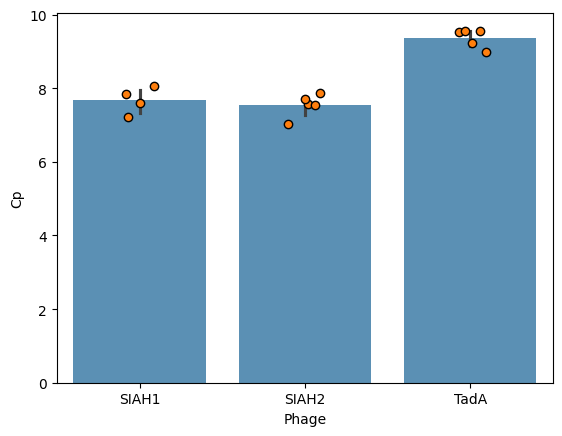

In [ ]:
_ = bars(d[d.Strain == 'S2208'], x='Phage', y='Cp')

In [ ]:
d['cp_init'] = pd.NA
for phage in ['SIAH1', 'SIAH2', 'TadA']:
    d.loc[d.Phage == phage, 'cp_init'] = d[(d.Phage == phage) & (d.Strain == 'LB')].Cp.mean() # & (d.Cp > 20)].Cp.mean()
d['log2(Fold Change)'] = d.cp_init - d.Cp

In [ ]:
d.loc[d.Strain == 'S2208', 'Substrate'] = 'PC'
d.Phage = d.Phage.map({'SIAH1': 'SIAH1-SP', 'SIAH2': 'SIAH2-SP', 'TadA': 'UN-SP'})
d.Substrate = d.Substrate.map(lambda x: {'EGLN3-WT': 'EGLN3', 'a-syn': 'SNCA'}.get(x, x))

In [ ]:
d

,Well,Cp,Strain,Phage,L1,L2,Substrate,Promoter,cp_init,log2(Fold Change)
0,A12,16.90,S2060 - 2009/1033,SIAH1-PC,1033,2009,EGLN3,strong,23.931667,7.031667
1,B12,17.55,S2060 - 2009/1033,SIAH1-PC,1033,2009,EGLN3,strong,23.931667,6.381667
2,C12,19.48,S2060 - 2009/1033,SIAH2-PC,1033,2009,EGLN3,strong,24.586667,5.106667
3,D12,19.52,S2060 - 2009/1033,SIAH2-PC,1033,2009,EGLN3,strong,24.586667,5.066667
4,E12,16.57,S2060 - 2009/1033,UN-SP,1033,2009,EGLN3,strong,21.445,4.875
...,...,...,...,...,...,...,...,...,...,...
157,C23,17.50,S2060 - 2008/1096,UN-SP,1096,2008,EGLN3-pep,weak,21.445,3.945
158,E23,17.15,S2060 - 2008/1098,UN-SP,1098,2008,FIQDVEP,weak,21.445,4.295
159,G23,16.11,S2060 - 2008/1099,UN-SP,1099,2008,MIQDVEP,weak,21.445,5.335
160,M23,17.10,LB,UN-SP,<NA>,<NA>,<NA>,<NA>,21.445,4.345


(0.0, 12.0)

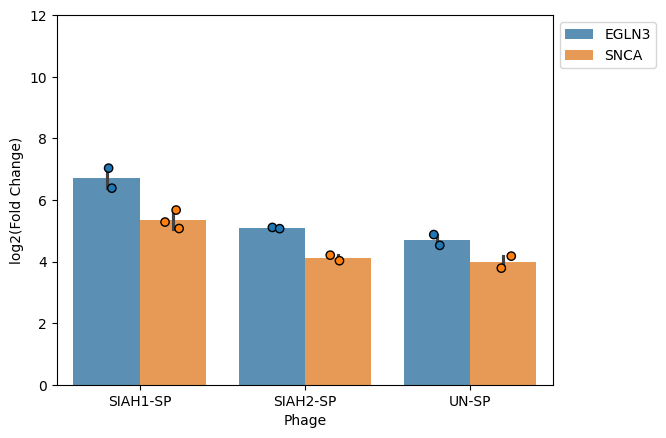

In [ ]:
d_sub = d[((d.Substrate.isin({'EGLN3', 'SNCA'}) & (d.Promoter == 'strong')))]
ax = bars(d_sub, x='Phage', y='log2(Fold Change)', hue='Substrate')
ax.set_ylim(0, 12)

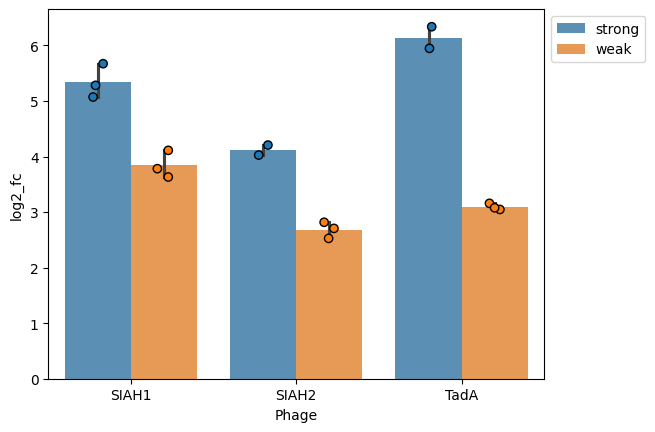

In [ ]:
d_promoter = d[(d.Substrate.isin({'a-syn'}))]
_ = bars(d_promoter, x='Phage', y='log2_fc', hue='Promoter')

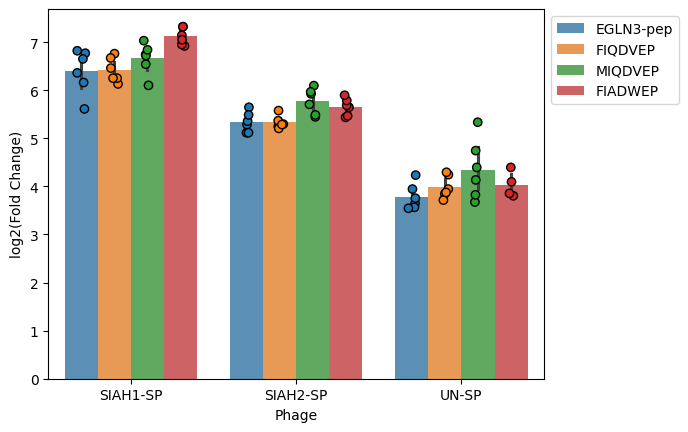

In [ ]:
d_degron = d[(d.Substrate.isin({'FIADWEP', 'EGLN3-WT', 'FIQDVEP', 'MIQDVEP', 'EGLN3-pep'})) & (d.Promoter == 'weak')]
_ = bars(d_degron, x='Phage', y='log2(Fold Change)', hue='Substrate')


<ipython-input-67-65da174d1df7>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


[Text(0, 0, 'FIADVEP (WT)'),
 Text(1, 0, 'FIQDVEP'),
 Text(2, 0, 'MIQDVEP'),
 Text(3, 0, 'FIADWEP')]

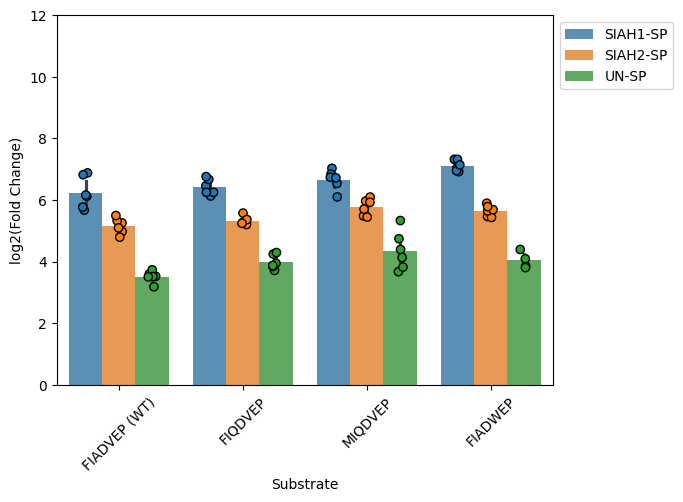

In [ ]:
d_degron = d[(d.Substrate.isin({'EGLN3', 'FIADWEP', 'FIQDVEP', 'MIQDVEP'})) & (d.Promoter == 'weak')]
d_degron = d_degron.sort_values(by='Substrate', key=lambda x: pd.Categorical(x, categories=['EGLN3', 'FIQDVEP', 'MIQDVEP', 'FIADWEP'], ordered=True))
d_degron.Substrate = d_degron.Substrate.map(lambda x: {'EGLN3': 'FIADVEP (WT)'}.get(x, x))
ax = bars(d_degron, x='Substrate', y='log2(Fold Change)', hue='Phage')
ax.set_ylim(0, 12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

In [ ]:
d.Substrate.unique()

array(['EGLN3', 'SNCA', 'EGLN3-pep', 'FIQDVEP', 'MIQDVEP', 'FIADWEP',
       <NA>, 'PC'], dtype=object)